In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

In [8]:

df = pd.read_csv("bank.csv")

In [9]:
# select target variable for binary classification
df.deposit = df.deposit.astype(str)
df.replace({'deposit': {'yes': 1, 'no': 0}},inplace=True)
y=df['deposit'].values

# select numerical features
df_log_reg = df[['age','balance','day','duration','campaign','pdays','previous']]




In [10]:
# normalize data
scaler = StandardScaler()
X=scaler.fit_transform(df_log_reg)

In [11]:
# create training and test samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [12]:
#train the logistic regression model
cls = LogisticRegression()
cls =cls.fit(X_train,y_train)
# predict labels on the test sample
y_out = cls.predict(X_test)
# calculate the corresponding probabilities
y_out_proba = cls.predict_proba(X_test)

In [13]:
# calculate metrics
accuracy = m.accuracy_score(y_test,y_out)
precision = m.precision_score(y_test,y_out)
recall = m.recall_score(y_test,y_out)
roc_auc = roc_auc_score(y_out,y_test)
f1_score = m.f1_score(y_test,y_out)

In [14]:

print('accuracy', accuracy )
print('precision', precision )
print('recall', recall )
print('roc_auc', roc_auc )
print('F1-score', f1_score )

accuracy 0.7414153478650344
precision 0.7671232876712328
recall 0.6621032980709396
roc_auc 0.74518243894265
F1-score 0.7107548430193721


In [15]:
#probability matrix
y_out_proba

array([[0.6776599 , 0.3223401 ],
       [0.03501555, 0.96498445],
       [0.21018178, 0.78981822],
       ...,
       [0.68993645, 0.31006355],
       [0.64511916, 0.35488084],
       [0.02440738, 0.97559262]])

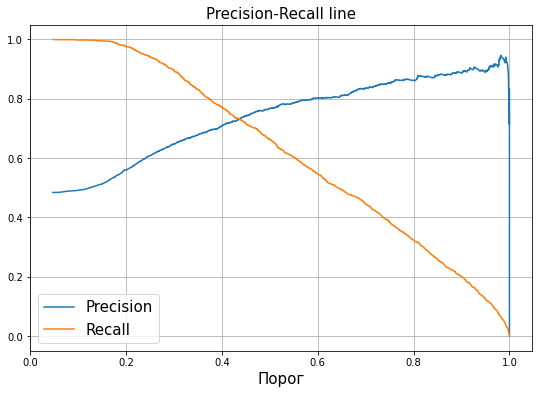

In [16]:
# build a graph for precision and recall with different binarization thresholds
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Порог",fontsize = 15)
plt.title(u'Precision-Recall line',fontsize = 15)
plt.legend(fontsize = 15)

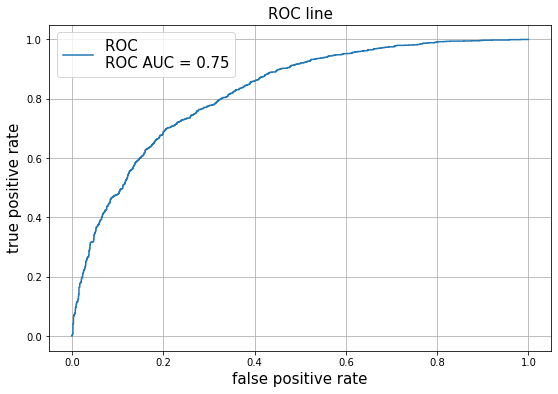

In [17]:
# строим график для ROC-кривой
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC line",fontsize = 15)
plt.legend(fontsize = 15)


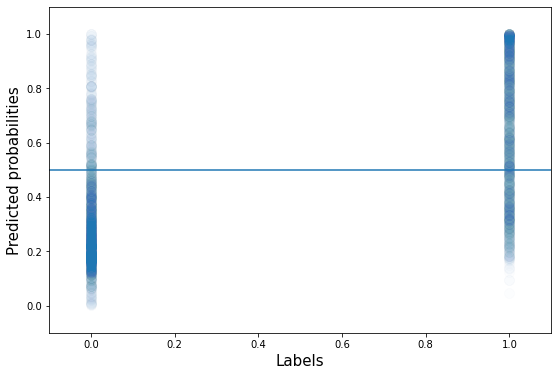

In [18]:
# look at the probability distribution
def scatter(actual, predicted, T):
    plt.figure(figsize = (9,6))
    plt.scatter(actual, predicted,s=100,alpha = 0.01)
    plt.xlabel(u"Labels",fontsize = 15)
    plt.ylabel(u"Predicted probabilities",fontsize = 15)
    plt.plot([-0.2, 1.2], [T, T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
scatter(y_test,y_out_proba[:,1],0.5)